In [1]:
%cd D:/SAME/Msc/5th semester/ANN and deep learning/HWs/HW2

D:\SAME\Msc\5th semester\ANN and deep learning\HWs\HW2


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
n = 28*28    #feature space dimension 
N_train = len(x_train)
N_test = len(x_test)

x_test = x_test.reshape((N_test, n))
x_train = x_train.reshape((N_train, n))

In [5]:
x_train = x_train[0:6000][:]
x_test = x_test[0:500][:]

In [6]:
x_train_scaled = x_train/225
x_test_scaled = x_test/225

In [7]:
y_train = y_train[0:6000]
y_test = y_test[0:500]

# Simple One Layer Autoencoder

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

Size of our encoded representation

In [9]:
encoding_dim = 32

Input Placeholder

In [10]:
input_img = Input(shape=(784,))

The encoded representation of the input

In [11]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

Reconstruction of the input

In [12]:
decoded = Dense(784,activation='sigmoid')(encoded)

Autoencoder Model

In [13]:
autoencoder = Model(input_img, decoded)

Input to encoded dimension model

In [14]:
encoder = Model(input_img, encoded)

encoded data to the input data model

In [15]:
# Create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
#create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Training

In [16]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_scaled, x_test_scaled), verbose=2)


Train on 6000 samples, validate on 500 samples
Epoch 1/50
 - 1s - loss: 0.6727 - val_loss: 0.6241
Epoch 2/50
 - 0s - loss: 0.4957 - val_loss: 0.3744
Epoch 3/50
 - 0s - loss: 0.3276 - val_loss: 0.3067
Epoch 4/50
 - 0s - loss: 0.2983 - val_loss: 0.2929
Epoch 5/50
 - 0s - loss: 0.2906 - val_loss: 0.2864
Epoch 6/50
 - 0s - loss: 0.2867 - val_loss: 0.2830
Epoch 7/50
 - 0s - loss: 0.2839 - val_loss: 0.2799
Epoch 8/50
 - 0s - loss: 0.2816 - val_loss: 0.2778
Epoch 9/50
 - 0s - loss: 0.2794 - val_loss: 0.2754
Epoch 10/50
 - 0s - loss: 0.2772 - val_loss: 0.2730
Epoch 11/50
 - 0s - loss: 0.2747 - val_loss: 0.2704
Epoch 12/50
 - 0s - loss: 0.2720 - val_loss: 0.2681
Epoch 13/50
 - 0s - loss: 0.2689 - val_loss: 0.2653
Epoch 14/50
 - 0s - loss: 0.2654 - val_loss: 0.2618
Epoch 15/50
 - 0s - loss: 0.2616 - val_loss: 0.2581
Epoch 16/50
 - 0s - loss: 0.2576 - val_loss: 0.2553
Epoch 17/50
 - 0s - loss: 0.2534 - val_loss: 0.2510
Epoch 18/50
 - 0s - loss: 0.2490 - val_loss: 0.2467
Epoch 19/50
 - 0s - loss:

In [18]:
encoded_train = encoder.predict(x_train_scaled)
encoded_test = encoder.predict(x_test_scaled)
decoded_tests = decoder.predict(encoded_test)

In [27]:
from keras.models import Sequential
from keras.layers import *
from keras import optimizers
from keras import losses
from keras.utils import to_categorical

In [28]:
model = Sequential()

model.add(Dense(512, input_dim=encoding_dim, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = optimizers.adam(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

In [30]:
model.fit(encoded_train, y_train, batch_size=4, epochs=30, shuffle=True, verbose=2, validation_data=(encoded_test, y_test))

Train on 6000 samples, validate on 500 samples
Epoch 1/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 2/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 3/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 4/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 5/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 6/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 7/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 8/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 9/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 10/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 11/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 12/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 13/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 14/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 15/30
 - 6s - loss: 14.3693 - val_loss: 14.5385
Epoch 16/30
 - 9s - loss: 14.3693 - val_loss: 14.5385
Epoch 17/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 18/30
 - 7s - loss: 14.3693 - val_loss

# Adding a sparsity constraint on the encoded representations

In [33]:
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))

# add a Dense layer with a L1 activity regularizer

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Deep Autoencoder

In [34]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_scaled, x_test_scaled))

Train on 6000 samples, validate on 500 samples
Epoch 1/100
6000/6000 [==============================] - 2s 266us/step - loss: 0.6864 - val_loss: 0.6659
Epoch 2/100
6000/6000 [==============================] - 1s 113us/step - loss: 0.4445 - val_loss: 0.2855
Epoch 3/100
6000/6000 [==============================] - 1s 109us/step - loss: 0.2848 - val_loss: 0.2785
Epoch 4/100
6000/6000 [==============================] - 1s 103us/step - loss: 0.2807 - val_loss: 0.2732
Epoch 5/100
6000/6000 [==============================] - 0s 80us/step - loss: 0.2785 - val_loss: 0.2731
Epoch 6/100
6000/6000 [==============================] - 1s 96us/step - loss: 0.2769 - val_loss: 0.2717
Epoch 7/100
6000/6000 [==============================] - 0s 82us/step - loss: 0.2761 - val_loss: 0.2723
Epoch 8/100
6000/6000 [==============================] - 1s 94us/step - loss: 0.2750 - val_loss: 0.2690
Epoch 9/100
6000/6000 [==============================] - 1s 104us/step - loss: 0.2741 - val_loss: 0.2662
Epoch 10/100

In [35]:
encoded_train = encoder.predict(x_train_scaled)
encoded_test = encoder.predict(x_test_scaled)

In [36]:
model.fit(encoded_train, y_train, batch_size=4, epochs=30, shuffle=True, verbose=2, validation_data=(encoded_test, y_test))

Train on 6000 samples, validate on 500 samples
Epoch 1/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 2/30
 - 8s - loss: 14.3693 - val_loss: 14.5385
Epoch 3/30
 - 8s - loss: 14.3693 - val_loss: 14.5385
Epoch 4/30
 - 10s - loss: 14.3693 - val_loss: 14.5385
Epoch 5/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 6/30
 - 9s - loss: 14.3693 - val_loss: 14.5385
Epoch 7/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 8/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 9/30
 - 8s - loss: 14.3693 - val_loss: 14.5385
Epoch 10/30
 - 8s - loss: 14.3693 - val_loss: 14.5385
Epoch 11/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 12/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 13/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 14/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 15/30
 - 8s - loss: 14.3693 - val_loss: 14.5385
Epoch 16/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 17/30
 - 7s - loss: 14.3693 - val_loss: 14.5385
Epoch 18/30
 - 7s - loss: 14.3693 - val_los

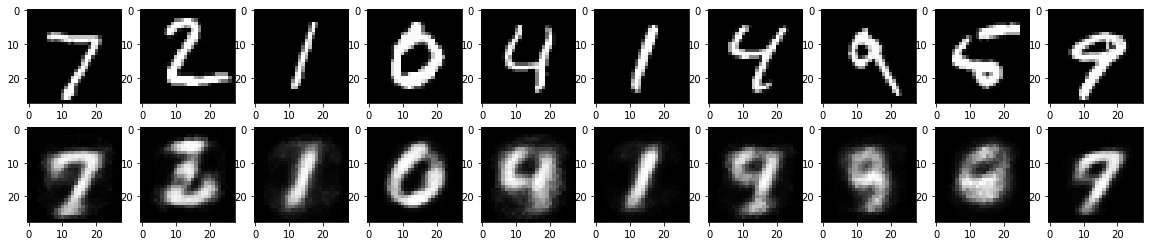

In [21]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_tests[i].reshape(28, 28))
    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
plt.show()